# Animations

In this reading, we'll animate a clock hand going in circles.  First, let's write a function that draws a hand for a specific time (no animation).  We'll use sin and cos (which use radians!), and assume that the hand pointing directly up is 0 degrees.

In [1]:
%matplotlib inline

In [2]:
from math import sin, cos, pi
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 16

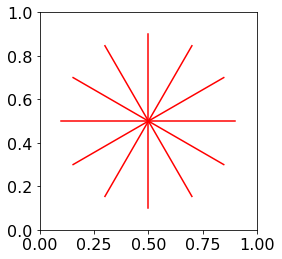

In [3]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

def draw_hand(area, time):
    # average range to get center of plot
    x1 = (area.get_xlim()[0] + area.get_xlim()[1]) / 2
    y1 = (area.get_ylim()[0] + area.get_ylim()[1]) / 2
    time %= 12 # 13 o'clock is the same as 1 o'clock (treat 12 as 0)
    percent = time / 12
    radians = percent * 2 * pi
    
    hand_length = 0.4
    x2 = x1 + sin(radians) * hand_length
    y2 = y1 + cos(radians) * hand_length
    hand = plt.Line2D((x1, x2), (y1, y2), color="r")
    area.add_artist(hand)

for time in range(12):
    draw_hand(ax, time)

There are all the hand positions, shown in one plot.  Don't worry to much if you don't completely understand the trig details.  Do notice we're creating a `Line2D` object and adding it to the are with `ax.add_artist(...)`.  This may also be new to you: `ax.set_aspect("equal")`.  It means that an interval on the x-axis will take up the same space as the same interval on the y-axis.  In contrast, the following plot uses twice as much space to go from 0 to 1 on the y-axis as on the x-axis, so the aspect ratio is 2.

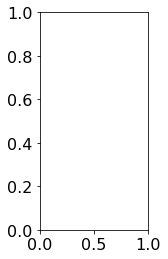

In [4]:
fix, ax = plt.subplots()
ax.set_aspect(2)

Let's create 12 subplots, with each time position.

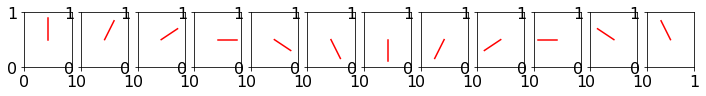

In [5]:
fix, axes = plt.subplots(ncols=12, figsize=(12,1))

for i in range(12):
    ax.set_aspect(1)
    draw_hand(axes[i], time=i)

To create an animation, you could imagine quickly flipping through the above still images.  When used this way, we would call those still images *frames* of our animation.

`FuncAnimation` objects in matplotlib help us automatically generate the frames for an animation, then stitch them together into a video:

In [6]:
from matplotlib.animation import FuncAnimation

We'll create a new animation with this: `FuncAnimation(OUR_FIGURE, SOME_FUNCTION_REFERENCE)`.

`SOME_FUNCTION_REFERENCE` should be a reference to some function that can be repeatedly called by the FuncAnimation.  The function should take as a parameter an integer describing the current frame number, then it should draw that frame on the figure.

In [7]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

def draw_frame(frame_num):
    t = frame_num / 4
    print(f"For frame {frame_num}, draw hand at time {t}")
    draw_hand(area=ax, time=t)

fa = FuncAnimation(fig, draw_frame) # no (), so we're not calling draw_frame!
print("created FuncAnimation, now let's create an HTML5 video with it")
html = fa.to_html5_video()
print("done creating the video, so let's close the figure")
plt.close(fig)

created FuncAnimation, now let's create an HTML5 video with it
For frame 0, draw hand at time 0.0
For frame 0, draw hand at time 0.0
For frame 1, draw hand at time 0.25
For frame 2, draw hand at time 0.5
For frame 3, draw hand at time 0.75
For frame 4, draw hand at time 1.0
For frame 5, draw hand at time 1.25
For frame 6, draw hand at time 1.5
For frame 7, draw hand at time 1.75
For frame 8, draw hand at time 2.0
For frame 9, draw hand at time 2.25
For frame 10, draw hand at time 2.5
For frame 11, draw hand at time 2.75
For frame 12, draw hand at time 3.0
For frame 13, draw hand at time 3.25
For frame 14, draw hand at time 3.5
For frame 15, draw hand at time 3.75
For frame 16, draw hand at time 4.0
For frame 17, draw hand at time 4.25
For frame 18, draw hand at time 4.5
For frame 19, draw hand at time 4.75
For frame 20, draw hand at time 5.0
For frame 21, draw hand at time 5.25
For frame 22, draw hand at time 5.5
For frame 23, draw hand at time 5.75
For frame 24, draw hand at time 6.0


Based on those prints, it looks like `draw_frame` is being called many times!  FuncAnimation can do this because we gave it a reference to `draw_frame`.  FuncAnimation is class, but logically, it's a little like this function:

```python
def animate(some_func):
    for frame in range(100):
        some_func(frame)

animate(draw_frame)
```

We did see "created FuncAnimation, now let's create an HTML5 video with it" is printed after the FuncAnimation is created, so one difference is that FuncAnimation doesn't call `some_func` until it has to (that is, when it's time to generate the video with `.to_html5_video()`).

The HTML we got back contains a video tag, as we can see if we look at a slice with the first few hundred characters:

In [8]:
html[:300]

'<video width="432" height="288" controls autoplay loop>\n  <source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAC4uG1kYXQAAAKtBgX//6ncRem9\n5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTU3IHIyOTY5IGQ0MDk5ZGQgLSBILjI2NC9NUEVHLTQg\nQVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0y'

We could save that in an HTML file, or even just embed it in our notebook:

In [9]:
from IPython.core.display import HTML
HTML(html)

Well, it's an animation, but new hands keep getting created.  We really wanted it to look like one hand was moving.  We can use `ax.cla()` at the start of each frame to make sure the hands from previous frames go away.

In [10]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

def draw_frame(frame_num):
    ax.cla()
    t = frame_num / 4
    draw_hand(area=ax, time=t)

fa = FuncAnimation(fig, draw_frame)
html = fa.to_html5_video()
plt.close(fig)

HTML(html)

What if we want the video to be smoother?  We need more frames (default is 100), shown at greater frequency (default interval is 200 milliseconds), with smaller changes between frames (we used `t = frame_num / 4`, so the hand moves a quarter hour for each frame).

To make it twice as smooth while maintaining the same speed, let's use 200 frames, 100 millisecond intervals, and move the hand one eighth each time.

In [11]:
fig, ax = plt.subplots()
ax.set_aspect("equal")

def draw_frame(frame_num):
    ax.cla()
    t = frame_num / 8
    draw_hand(area=ax, time=t)

fa = FuncAnimation(fig, draw_frame, frames=200, interval=100)
html = fa.to_html5_video()
plt.close(fig)

HTML(html)

That's a higher quality video, but it took longer to generate.  It is recommended to first get your animation working with course-grained animation while debugging, then make it smooth as a last step.